In [1]:
# Predict the weight of grapes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

            weight    length  diameter
weight    1.000000  0.759610  0.964583
length    0.759610  1.000000  0.634728
diameter  0.964583  0.634728  1.000000


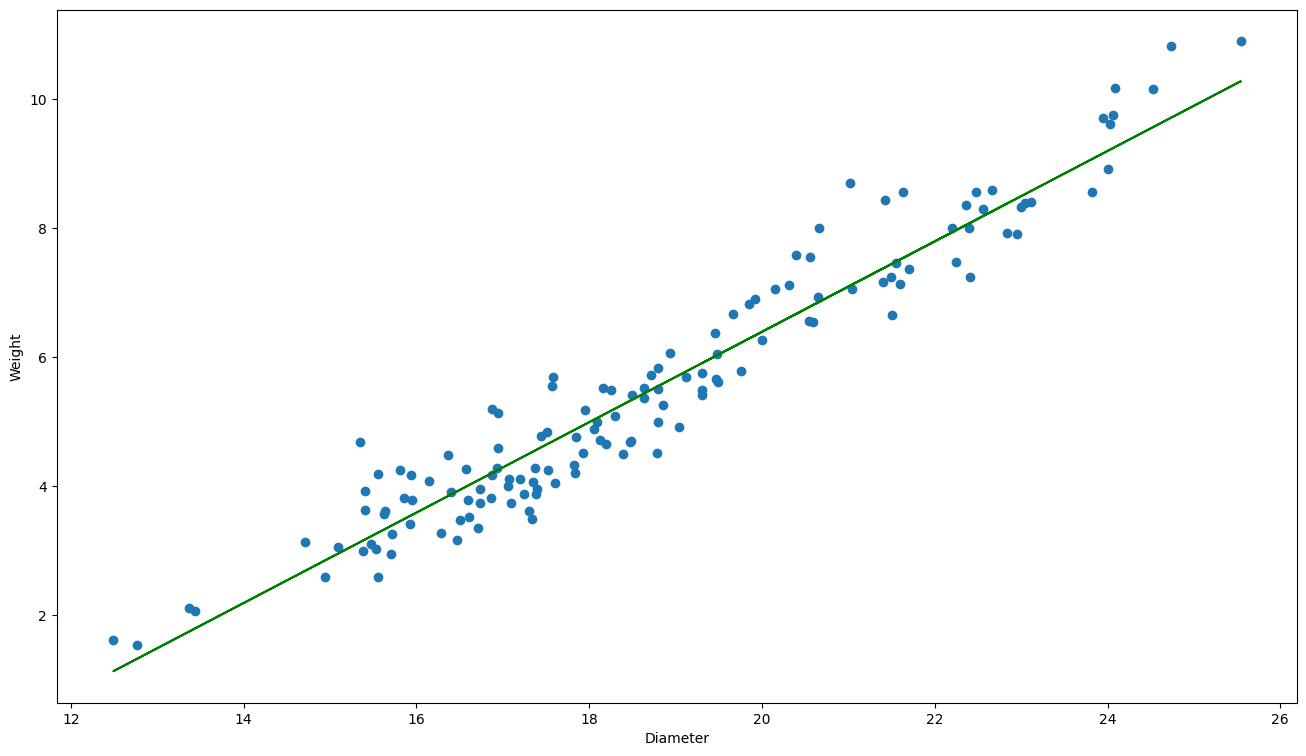

R2 = 0.9298255884870789
     weight  length  diameter   color     error
70     6.05   25.36     19.48   green  0.018873
55     7.46   25.77     21.55  purple  0.021718
30     4.17   23.50     16.87   green  0.032122
114    3.91   22.37     16.40   green  0.037240
23     5.51   25.01     18.80   green  0.044605
..      ...     ...       ...     ...       ...
63     8.44   29.43     21.42   green  1.049382
11    10.83   28.37     24.74  purple  1.112831
102    8.00   28.15     20.66   green  1.141966
123    4.69   27.32     15.35   green  1.553046
108    8.70   30.48     21.02   green  1.589690

[138 rows x 5 columns]


In [21]:
# 1. Load the data into a pandas data frame
df = pd.read_csv("grapes.csv")
df.drop(67, inplace=True)

# 2. Look at the table of correlations between variables.

print(df.corr(numeric_only=True))

# Which variable is more highly correlated with weight?
# - is it weight or diameter?
#             weight    length  diameter
# weight    1.000000  0.759528  0.947978
# length    0.759528  1.000000  0.625881
# diameter  0.947978  0.625881  1.0000
# Answer: diameter is closest to weight- 0.947978 vs 1.000000  

# 3. Draw a scatter plot of this variable vs weight
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.set_xlabel("Diameter")
ax.set_ylabel("Weight")
ax.scatter(df["diameter"], df["weight"])


# Are any of the values anomalous? Do any of the values seem out of place
# compares to the other values in the data?
X = df["diameter"].values.reshape(-1, 1)
y = df["weight"]

(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_line = model.predict(X)
ax.plot(X, y_line, color="green")

plt.show()

y_predicted = model.predict(X_test)
r2 = r2_score(y_test, y_predicted)

print(f"R2 = {r2}")

df["error"] = abs(y_line - y)
print(df.sort_values(by="error"))
